# Kaggle1. Titanic

## 1. What is the problems?
- Predict who are survived.

## 2. EDA

### 2-1) Load the datasets

In [89]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

train_set = pd.read_csv('./input/train.csv')
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
test_set = pd.read_csv('./input/test.csv')
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### 2-2) Feature selections
- Candidates
 - Pclass : categorical data
 - Sex : categorical data
 - Age : real value and considering seperate the sections
 - SibSp : real value
 - Parch : real value
 - Fare : real value
 - Embark : categorical data

> Pclass

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (6, 6)
rcParams['font.size'] = 8

plt.style.use('ggplot')
# sns.set_style({'font.size': 25, 'figure.figsize': (45, 20)})

In [4]:
green_cmap = sns.light_palette("green", as_cmap=True)

pd.crosstab(train_set.Pclass, train_set.Survived, margins=True)\
.style.background_gradient(cmap=green_cmap)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- <U>If class level is higher, the ratio of Survived is increase.</U>
 - 1 Pclass : 136 / 216
 - 2 Pclass : 87 / 184
 - 3 Pclass : 119 / 491

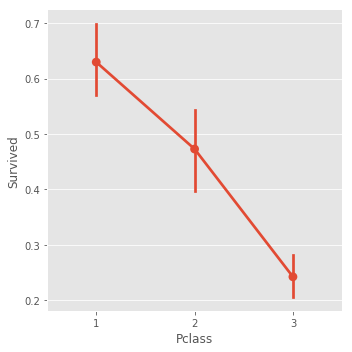

In [5]:
sns.factorplot('Pclass', 'Survived', data = train_set, size=5)

So, use **Pclass** as a feature.

> Sex

In [6]:
sex_perc = train_set[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

- The ratio of Survived is much higher in female.

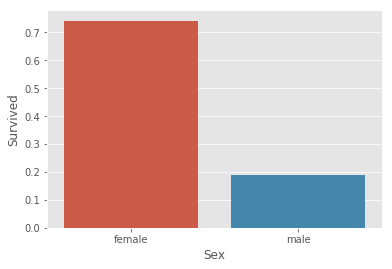

In [7]:
sns.barplot(x="Sex", y="Survived", data=sex_perc)

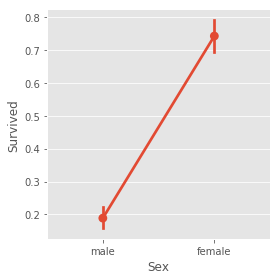

In [8]:
sns.factorplot("Sex", "Survived", data=train_set)

- <U>The ratio of Survived is higher in female.</U>

So, use the **Sex** as a feature.

> Age

In [9]:
age_percent = train_set[["Age", "Survived"]].groupby("Age", as_index=False).mean()

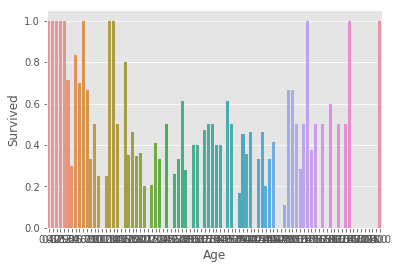

In [10]:
sns.barplot("Age", "Survived", data=age_percent)

In [11]:
# Age에 대한 smoothing
train_set['Title'] = train_set['Name']
for name_string in train_set['Name']:
    train_set['Title'] = train_set['Name'].str.extract('([A-Za-z]+)\.')
    
titles = set(train_set['Title'])
for title in titles:
    smoothed_age = train_set.groupby('Title')['Age'].median()[title]
    train_set['Age'].loc[train_set['Age'].isnull() & (train_set['Title'] == title)] = smoothed_age

In [12]:
# divide age sections.
train_set["Age_sec"] = np.nan
for i in range(10, 0, -1):
    train_set.loc[train_set["Age"] <= i*10, "Age_sec"] = i*10
    
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_sec
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,40.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,40.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,40.0


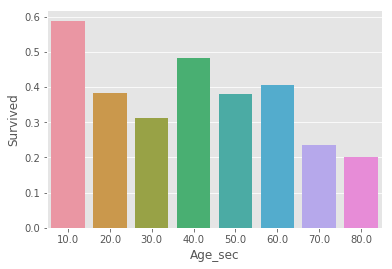

In [13]:
age_sec_percent = train_set[["Age_sec", "Survived"]].groupby("Age_sec", as_index=False).mean()
sns.barplot("Age_sec", "Survived", data=age_sec_percent)

In [14]:
train_set['Age_seg'] = 'Adult'
train_set['Age_seg'].loc[train_set['Age'] > 70] = 'Very Old'
train_set['Age_seg'].loc[train_set['Age'] < 10 ] = 'Very Young'

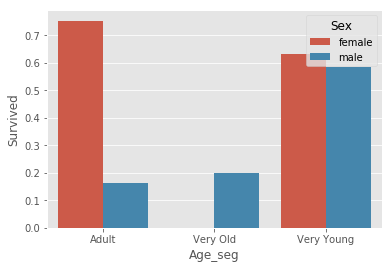

In [15]:
age_seg_perc = train_set[['Age_seg', 'Sex','Survived']].groupby(['Age_seg', 'Sex'], as_index=False).mean()
sns.barplot('Age_seg', 'Survived', hue='Sex', data=age_seg_perc)

In [16]:
# Test set
test_set['Title'] = test_set['Name']
for name_string in test_set['Name']:
    test_set['Title'] = test_set['Name'].str.extract('([A-Za-z]+)\.')
    
test_titles = set(test_set['Title'])
for title in test_titles:
    smoothed_age = test_set.groupby('Title')['Age'].median()[title]
    if np.isnan(smoothed_age):
        smoothed_age = train_set.groupby('Title')['Age'].median()[title]
    test_set['Age'].loc[test_set['Age'].isnull() & (test_set['Title'] == title)] = smoothed_age

test_set['Age_seg'] = 'Adult'
test_set['Age_seg'].loc[test_set['Age'] > 70] = 'Very Old'
test_set['Age_seg'].loc[test_set['Age'] < 10 ] = 'Very Young'

test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.674641,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.966798,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,36.500000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


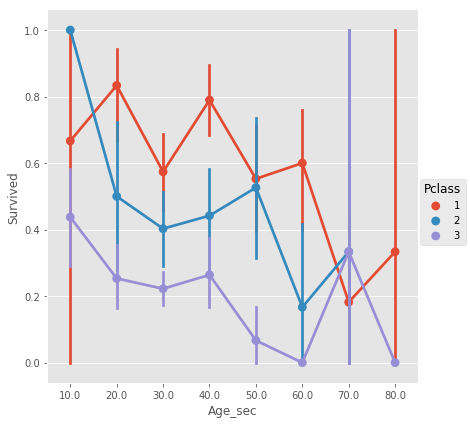

In [17]:
sns.factorplot("Age_sec", "Survived", hue="Pclass", data=train_set, size=6)

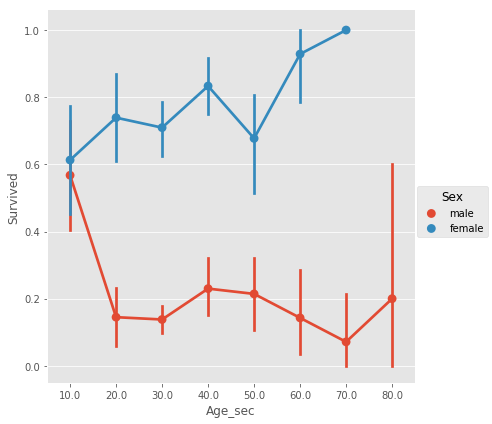

In [18]:
sns.factorplot("Age_sec", "Survived", hue="Sex", data=train_set, size=6)

- The count of Survived is more higher in Young, old people.
 - When Pclass is higher, the ratio of Survived is higher on whole age section.
 - In case of male, the 10s, 30s, 40s, 80s are higher.
 - In case of female, 60s, 70s are higher.
- Age affects to the Survived and dependant to Sex or Pclass.

So, use the **Age** as a feature.

> Title

In [19]:
title_list = sorted(list(set(train_set['Title'])))

In [20]:
train_set['Title'] = train_set['Title'].map({
    'Capt': 0, 'Col': 1, 'Countess': 2, 'Don': 3,
    'Dr': 4, 'Jonkheer': 5, 'Lady': 6, 'Major': 7,
    'Master': 8, 'Miss': 9, 'Mlle': 10, 'Mme': 11,
    'Mr': 12, 'Mrs': 13, 'Ms': 14, 'Rev': 15, 'Sir': 16
})

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_sec,Age_seg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,12,30.0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,13,40.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9,30.0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13,40.0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,12,40.0,Adult


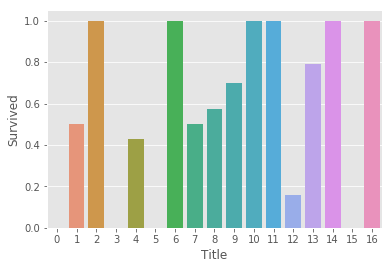

In [21]:
title_prec = train_set[['Title', 'Survived']].groupby('Title', as_index=False).mean()
sns.barplot('Title', 'Survived', data=title_prec)

In [22]:
test_title_list = sorted(list(set(test_set['Title'])))
test_title_list

['Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev']

In [23]:
test_set['Title'] = test_set['Title'].map({
    'Capt': 0, 'Col': 1, 'Countess': 2, 'Don': 3,
    'Dr': 4, 'Jonkheer': 5, 'Lady': 6, 'Major': 7,
    'Master': 8, 'Miss': 9, 'Mlle': 10, 'Mme': 11,
    'Mr': 12, 'Mrs': 13, 'Ms': 14, 'Rev': 15, 'Sir': 16
})

In [24]:
# null 값 처리 : 찾아보니 Miss 였다.
test_set['Title'] = test_set['Title'].fillna(14)

> SibSp and Parch

In [25]:
# SibSp -> Sex could affect!
pd.crosstab([train_set.Survived, train_set.Sex], train_set.SibSp, margins=True)\
.style.background_gradient(cmap=green_cmap)

In [26]:
pd.crosstab([train_set.Survived, train_set.Sex], train_set.Parch, margins=True)\
.style.background_gradient(cmap=green_cmap)

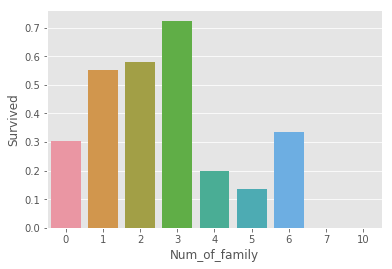

In [27]:
# 총 가족의 수를 생각해보자.
train_set['Num_of_family'] = train_set['SibSp'] + train_set['Parch']

num_of_family_perc = train_set[['Num_of_family', 'Survived']].groupby('Num_of_family', as_index=False).mean()
sns.barplot('Num_of_family', 'Survived', data=num_of_family_perc)

In [28]:
train_set['Family_size'] = 'None'

train_set['Family_size'].loc[train_set['Num_of_family'] >= 4] = 'Large'
# train_set['Family_size'].loc[train_set['Num_of_family'] < 4] = 'Medium'
train_set['Family_size'].loc[train_set['Num_of_family'] < 4] = 'Small'
train_set['Family_size'].loc[train_set['Num_of_family'] == 0] = 'None'

train_set['Family_size'] = train_set['Family_size'].map({'None': 0, 'Small': 1, 'Medium': 2, 'Large': 3})

train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_sec,Age_seg,Num_of_family,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,12,30.0,Adult,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,13,40.0,Adult,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9,30.0,Adult,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13,40.0,Adult,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,12,40.0,Adult,0,0


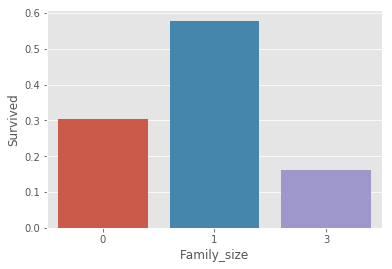

In [29]:
title_prec = train_set[['Family_size', 'Survived']].groupby('Family_size', as_index=False).mean()
sns.barplot('Family_size', 'Survived', data=title_prec)

In [30]:
# 테스트 Set 세팅
test_set['Num_of_family'] = test_set['SibSp'] + test_set['Parch']
test_set['Family_size'] = 'None'

test_set['Family_size'].loc[test_set['Num_of_family'] >= 4] = 'Large'
# test_set['Family_size'].loc[test_set['Num_of_family'] < 4] = 'Medium'
test_set['Family_size'].loc[test_set['Num_of_family'] < 4] = 'Small'
test_set['Family_size'].loc[test_set['Num_of_family'] == 0] = 'None'

test_set['Family_size'] = test_set['Family_size'].map({'None': 0, 'Small': 1, 'Medium': 2, 'Large': 3})

test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_seg,Num_of_family,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,12.0,Adult,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,13.0,Adult,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,12.0,Adult,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,12.0,Adult,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,13.0,Adult,2,1


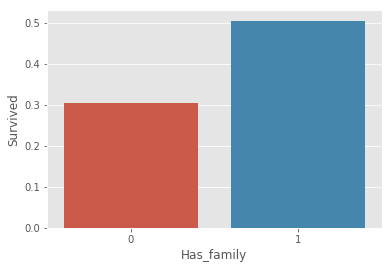

In [31]:
train_set['Has_family'] = 1
train_set['Has_family'].loc[train_set['Num_of_family'] == 0] = 0

has_family_perc = train_set[['Has_family', 'Survived']].groupby('Has_family', as_index=False).mean()
sns.barplot('Has_family', 'Survived', data=has_family_perc)

In [32]:
test_set['Has_family'] = 1
test_set['Has_family'].loc[test_set['Num_of_family'] == 0] = 0

- Male without parents, child, sibling, spouse died more than others.

So, use **SibSp** and **Parch** as features.

> Fare

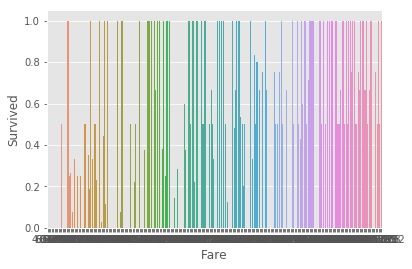

In [33]:
fare_percent = train_set[["Fare", "Survived"]].groupby("Fare", as_index=False).mean()
sns.barplot('Fare', 'Survived', data=fare_percent)

In [34]:
train_set['Fare_seg'] = 0

train_set['Fare_seg'].loc[train_set['Fare'] >= 25] = 2
train_set['Fare_seg'].loc[train_set['Fare'] >= 50] = 3
train_set['Fare_seg'].loc[train_set['Fare'] >= 75] = 4
train_set['Fare_seg'].loc[train_set['Fare'] < 25] = 1

train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_sec,Age_seg,Num_of_family,Family_size,Has_family,Fare_seg
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,12,30.0,Adult,1,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,13,40.0,Adult,1,1,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9,30.0,Adult,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,13,40.0,Adult,1,1,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,12,40.0,Adult,0,0,0,1


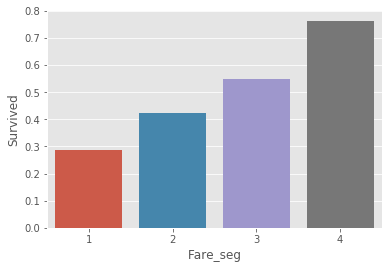

In [35]:
fare_seg_perc = train_set[['Fare_seg', 'Survived']].groupby('Fare_seg', as_index=False).mean()
sns.barplot('Fare_seg', 'Survived', data=fare_seg_perc)

In [36]:
test_set["Fare"] = test_set["Fare"].fillna(test_set["Fare"].median())

test_set['Fare_seg'] = 0

test_set['Fare_seg'].loc[test_set['Fare'] >= 25] = 2
test_set['Fare_seg'].loc[test_set['Fare'] >= 50] = 3
test_set['Fare_seg'].loc[test_set['Fare'] >= 75] = 4
test_set['Fare_seg'].loc[test_set['Fare'] < 25] = 1

test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_seg,Num_of_family,Family_size,Has_family,Fare_seg
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,12.0,Adult,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,13.0,Adult,1,1,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,12.0,Adult,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,12.0,Adult,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,13.0,Adult,2,1,1,1


> Embarked

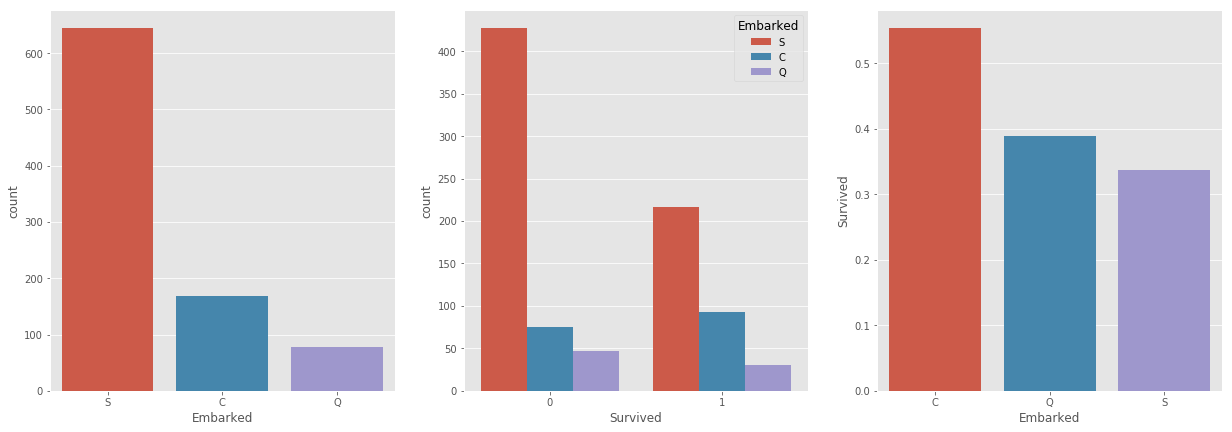

In [37]:
embarked_perc = train_set[["Embarked", "Survived"]].groupby("Embarked", as_index=False).mean()

fig, (axes_1, axes_2, axes_3) = plt.subplots(1, 3, figsize=(21, 7))

sns.countplot(x="Embarked", data=train_set, ax=axes_1)
sns.countplot(x="Survived", hue="Embarked", data=train_set, order=[0, 1], ax=axes_2)
sns.barplot(x="Embarked", y="Survived", data=embarked_perc, ax=axes_3)

In [38]:
train_set['Embarked'] = train_set['Embarked'].fillna('S')

# train_set['Embarked'] = train_set['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
# test_set['Embarked'] = test_set['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

- C is higher.

So, use **Embarked** as a feature.

> Cabin

In [39]:
train_set['Is_cabin'] = 0
train_set['Is_cabin'].loc[train_set['Cabin'].notnull()] = 1

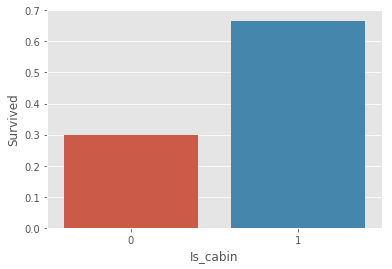

In [40]:
cabin_perc = train_set[['Is_cabin', 'Survived']].groupby('Is_cabin', as_index=False).mean()
sns.barplot('Is_cabin', 'Survived', data=cabin_perc)

In [41]:
test_set['Is_cabin'] = 0
test_set['Is_cabin'].loc[test_set['Cabin'].notnull()] = 1

> Family Relationship

In [42]:
train_set['Last_name'] = train_set['Name'].apply(lambda x: str.split(x, ',')[0])
test_set['Last_name'] = test_set['Name'].apply(lambda x: str.split(x, ',')[0])

feat_list = ['PassengerId', 'Fare', 'Last_name', 'Embarked', 'Name', 'Num_of_family', 'SibSp', 'Parch', 'Ticket']
group_1ist = ['Fare', 'Last_name', 'Embarked']

f_train_set = pd.merge(train_set[feat_list], train_set[['PassengerId', 'Survived']])

f_train_set.head()

,PassengerId,Fare,Last_name,Embarked,Name,Num_of_family,SibSp,Parch,Ticket,Survived
0,1,7.2500,Braund,S,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0
1,2,71.2833,Cumings,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,1
2,3,7.9250,Heikkinen,S,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,1
3,4,53.1000,Futrelle,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,1
4,5,8.0500,Allen,S,"Allen, Mr. William Henry",0,0,0,373450,0


In [43]:
f_test_set = test_set[feat_list]
f_test_set.head()

,PassengerId,Fare,Last_name,Embarked,Name,Num_of_family,SibSp,Parch,Ticket
0,892,7.8292,Kelly,Q,"Kelly, Mr. James",0,0,0,330911
1,893,7.0000,Wilkes,S,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272
2,894,9.6875,Myles,Q,"Myles, Mr. Thomas Francis",0,0,0,240276
3,895,8.6625,Wirz,S,"Wirz, Mr. Albert",0,0,0,315154
4,896,12.2875,Hirvonen,S,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,1,1,3101298


In [44]:
f_merged_df = pd.concat([f_train_set, f_test_set], ignore_index=True)

In [45]:
# 데이터가 더이상 없음... 그냥 휴리스틱하게 데이터를 보자!
from IPython.display import display
cnt = 0
for group, group_df in f_merged_df.groupby(group_1ist):
    if (pd.Series(group_df['Num_of_family']).min() > 0 and len(group_df) > 1):
        display(group_df)
        cnt+=1
        if cnt == 20:
            break

,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
371,S,6.4958,Wiklund,"Wiklund, Mr. Jakob Alfred",1,0,372,1,0.0,3101267
1123,S,6.4958,Wiklund,"Wiklund, Mr. Karl Johan",1,0,1124,1,NaN,3101266


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
352,C,7.2292,Elias,"Elias, Mr. Tannous",2,1,353,1,0.0,2695
532,C,7.2292,Elias,"Elias, Mr. Joseph Jr",2,1,533,1,0.0,2690
1228,C,7.2292,Elias,"Elias, Mr. Joseph",2,2,1229,0,NaN,2675


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
214,Q,7.75,Kiernan,"Kiernan, Mr. Philip",1,0,215,1,0.0,367229
1012,Q,7.75,Kiernan,"Kiernan, Mr. John",1,0,1013,1,NaN,367227


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
104,S,7.925,Gustafsson,"Gustafsson, Mr. Anders Vilhelm",2,0,105,2,0.0,3101276
392,S,7.925,Gustafsson,"Gustafsson, Mr. Johan Birger",2,0,393,2,0.0,3101277


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
729,S,7.925,Ilmakangas,"Ilmakangas, Miss. Pieta Sofia",1,0,730,1,0.0,STON/O2. 3101271
909,S,7.925,Ilmakangas,"Ilmakangas, Miss. Ida Livija",1,0,910,1,NaN,STON/O2. 3101270


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
803,C,8.5167,Thomas,"Thomas, Master. Assad Alexander",1,1,804,0,1.0,2625
995,C,8.5167,Thomas,"Thomas, Mrs. Alexander (Thamine Thelma"")""",2,1,996,1,NaN,2625


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
69,S,8.6625,Kink,"Kink, Mr. Vincenz",2,0,70,2,0.0,315151
1267,S,8.6625,Kink,"Kink, Miss. Maria",2,0,1268,2,NaN,315152


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
855,S,9.35,Aks,"Aks, Mrs. Sam (Leah Rosen)",1,1,856,0,1.0,392091
1198,S,9.35,Aks,"Aks, Master. Philip Frank",1,1,1199,0,NaN,392091


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
113,S,9.825,Jussila,"Jussila, Miss. Katriina",1,0,114,1,0.0,4136
402,S,9.825,Jussila,"Jussila, Miss. Mari Aina",1,0,403,1,0.0,4137


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
205,S,10.4625,Strom,"Strom, Miss. Telma Matilda",1,1,206,0,0.0,347054
251,S,10.4625,Strom,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",2,1,252,1,0.0,347054


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
8,S,11.1333,Johnson,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,2,9,0,1.0,347742
172,S,11.1333,Johnson,"Johnson, Miss. Eleanor Ileen",2,1,173,1,1.0,347742
869,S,11.1333,Johnson,"Johnson, Master. Harold Theodor",2,1,870,1,1.0,347742


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
39,C,11.2417,Nicola-Yarred,"Nicola-Yarred, Miss. Jamila",1,0,40,1,1.0,2651
125,C,11.2417,Nicola-Yarred,"Nicola-Yarred, Master. Elias",1,0,126,1,1.0,2651


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
861,S,11.5,Giles,"Giles, Mr. Frederick Edward",1,0,862,1,0.0,28134
1261,S,11.5,Giles,"Giles, Mr. Edgar",1,0,1262,1,NaN,28133


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
1044,S,12.1833,Klasen,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",2,2,1045,0,NaN,350405
1154,S,12.1833,Klasen,"Klasen, Miss. Gertrud Emilia",2,1,1155,1,NaN,350405


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
479,S,12.2875,Hirvonen,"Hirvonen, Miss. Hildur E",1,1,480,0,1.0,3101298
895,S,12.2875,Hirvonen,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,1,896,1,NaN,3101298


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
751,S,12.475,Moor,"Moor, Master. Meier",1,1,752,0,1.0,392096
823,S,12.475,Moor,"Moor, Mrs. (Beila)",1,1,824,0,1.0,392096


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
691,C,13.4167,Karun,"Karun, Miss. Manca",1,1,692,0,1.0,349256
931,C,13.4167,Karun,"Karun, Mr. Franz",1,1,932,0,NaN,349256


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
1050,S,13.775,Peacock,"Peacock, Mrs. Benjamin (Edith Nile)",2,2,1051,0,NaN,SOTON/O.Q. 3101315
1172,S,13.775,Peacock,"Peacock, Master. Alfred Edward",2,1,1173,1,NaN,SOTON/O.Q. 3101315
1300,S,13.775,Peacock,"Peacock, Miss. Treasteall",2,1,1301,1,NaN,SOTON/O.Q. 3101315


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
866,C,13.8583,Duran y More,"Duran y More, Miss. Asuncion",1,0,867,1,1.0,SC/PARIS 2149
1111,C,13.8583,Duran y More,"Duran y More, Miss. Florentina",1,0,1112,1,NaN,SC/PARIS 2148


,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
981,S,13.9,Dyker,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",1,0,982,1,NaN,347072
1063,S,13.9,Dyker,"Dyker, Mr. Adolf Fredrik",1,0,1064,1,NaN,347072


In [46]:
f_merged_df[(f_merged_df['Last_name'] == 'Andersson') & (f_merged_df['Num_of_family'] == 6)]

,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket
13,S,31.275,Andersson,"Andersson, Mr. Anders Johan",6,5,14,1,0.0,347082
68,S,7.925,Andersson,"Andersson, Miss. Erna Alexandra",6,2,69,4,1.0,3101281
119,S,31.275,Andersson,"Andersson, Miss. Ellis Anna Maria",6,2,120,4,0.0,347082
541,S,31.275,Andersson,"Andersson, Miss. Ingeborg Constanzia",6,2,542,4,0.0,347082
542,S,31.275,Andersson,"Andersson, Miss. Sigrid Elisabeth",6,2,543,4,0.0,347082
610,S,31.275,Andersson,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",6,5,611,1,0.0,347082
813,S,31.275,Andersson,"Andersson, Miss. Ebba Iris Alfrida",6,2,814,4,0.0,347082
850,S,31.275,Andersson,"Andersson, Master. Sigvard Harald Elias",6,2,851,4,0.0,347082
1105,S,7.775,Andersson,"Andersson, Miss. Ida Augusta Margareta",6,2,1106,4,NaN,347091


In [47]:
f_merged_df['Is_family_survived'] = 0.5

In [48]:
for _, group_df in f_merged_df.groupby(group_1ist):
    if (len(group_df) > 1):
        _max = group_df['Survived'].max()
        _min = group_df['Survived'].min()
        for idx, row in group_df.iterrows():
            if (_max == 1):
                f_merged_df['Is_family_survived'].loc[f_merged_df['PassengerId'] == row['PassengerId']] = _max
            elif (_min == 0):
                f_merged_df['Is_family_survived'].loc[f_merged_df['PassengerId'] == row['PassengerId']] = _min

In [49]:
for _, group_df in f_merged_df.groupby('Ticket'):
    if (len(group_df) > 1):
        _max = group_df['Survived'].max()
        _min = group_df['Survived'].min()
        for idx, row in group_df.iterrows():
            if ((row['Is_family_survived'] == 0) | (row['Is_family_survived'] == 0.5)):
                if (_max == 1):
                    f_merged_df['Is_family_survived'].loc[f_merged_df['PassengerId'] == row['PassengerId']] = _max
                elif (_min == 0):
                    f_merged_df['Is_family_survived'].loc[f_merged_df['PassengerId'] == row['PassengerId']] = _min

In [50]:
f_merged_df.head()

,Embarked,Fare,Last_name,Name,Num_of_family,Parch,PassengerId,SibSp,Survived,Ticket,Is_family_survived
0,S,7.2500,Braund,"Braund, Mr. Owen Harris",1,0,1,1,0.0,A/5 21171,0.5
1,C,71.2833,Cumings,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,2,1,1.0,PC 17599,1.0
2,S,7.9250,Heikkinen,"Heikkinen, Miss. Laina",0,0,3,0,1.0,STON/O2. 3101282,0.5
3,S,53.1000,Futrelle,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,4,1,1.0,113803,1.0
4,S,8.0500,Allen,"Allen, Mr. William Henry",0,0,5,0,0.0,373450,0.5


In [51]:
train_set['Is_family_survived'] = f_merged_df['Is_family_survived'][:891]
test_set = pd.merge(test_set, f_merged_df[['PassengerId', 'Is_family_survived']][891:]) 

In [52]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Age_sec,Age_seg,Num_of_family,Family_size,Has_family,Fare_seg,Is_cabin,Last_name,Is_family_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,12,30.0,Adult,1,1,1,1,0,Braund,0.5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,13,40.0,Adult,1,1,1,3,1,Cumings,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,9,30.0,Adult,0,0,0,1,0,Heikkinen,0.5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,13,40.0,Adult,1,1,1,3,1,Futrelle,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,12,40.0,Adult,0,0,0,1,0,Allen,0.5


In [53]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_seg,Num_of_family,Family_size,Has_family,Fare_seg,Is_cabin,Last_name,Is_family_survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,12.0,Adult,0,0,0,1,0,Kelly,0.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,13.0,Adult,1,1,1,1,0,Wilkes,0.5
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,12.0,Adult,0,0,0,1,0,Myles,0.5
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,12.0,Adult,0,0,0,1,0,Wirz,0.5
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,13.0,Adult,2,1,1,1,0,Hirvonen,1.0


### 2-3. Checking correlations.

In [54]:
temp_df = train_set[['Survived', 'Sex', 'Age_seg', 'Has_family', 'Family_size', 'Fare_seg', 'Embarked', \
                     'Age', 'Is_cabin', 'Title', 'Is_family_survived']]

categorical_features = ['Sex', 'Age_seg', 'Embarked']
selected_df = pd.get_dummies(temp_df, categorical_features)

selected_df.head(10)

,Survived,Has_family,Family_size,Fare_seg,Age,Is_cabin,Title,Is_family_survived,Sex_female,Sex_male,Age_seg_Adult,Age_seg_Very Old,Age_seg_Very Young,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,1,22.0,0,12,0.5,0,1,1,0,0,0,0,1
1,1,1,1,3,38.0,1,13,1.0,1,0,1,0,0,1,0,0
2,1,0,0,1,26.0,0,9,0.5,1,0,1,0,0,0,0,1
3,1,1,1,3,35.0,1,13,1.0,1,0,1,0,0,0,0,1
4,0,0,0,1,35.0,0,12,0.5,0,1,1,0,0,0,0,1
5,0,0,0,1,30.0,0,12,0.5,0,1,1,0,0,0,1,0
6,0,0,0,3,54.0,1,12,0.0,0,1,1,0,0,0,0,1
7,0,1,3,1,2.0,0,8,0.0,0,1,0,0,1,0,0,1
8,1,1,1,1,27.0,0,13,1.0,1,0,1,0,0,0,0,1
9,1,1,1,2,14.0,0,13,1.0,1,0,1,0,0,1,0,0


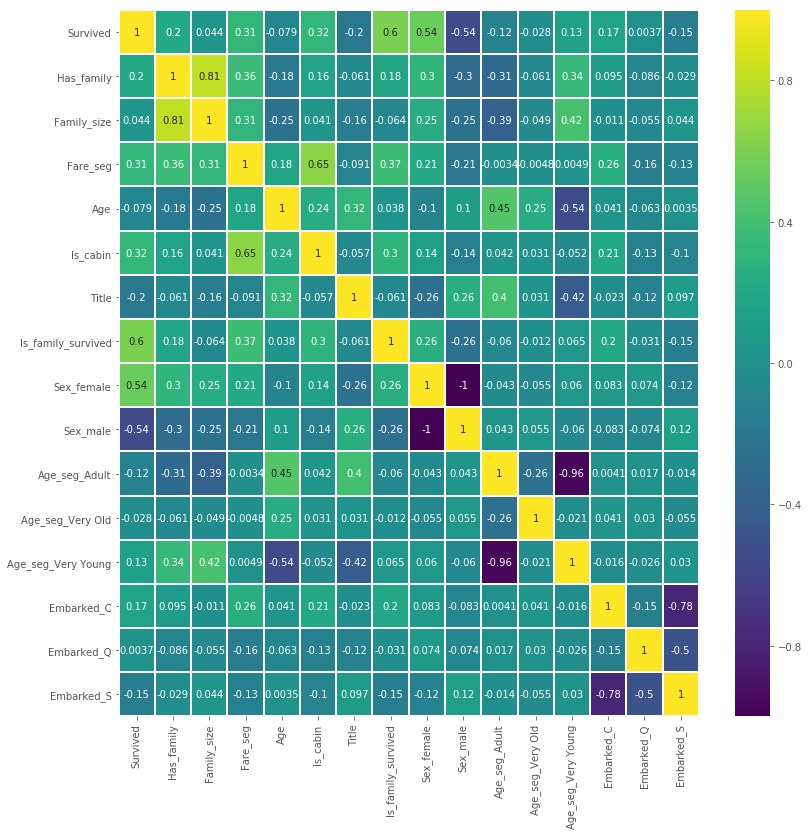

In [55]:
fig = plt.figure()
fig.set_size_inches(13, 13)

correlation = selected_df.corr()
sns.heatmap(correlation, cmap="viridis", annot=True, linewidths=1)

In [56]:
test_temp_df = test_set[['Sex', 'Age_seg', 'Has_family', 'Family_size', 'Fare_seg', 'Embarked', \
                         'Age', 'Is_cabin', 'Title', 'Is_family_survived']]

categorical_features = ['Sex', 'Age_seg', 'Embarked']
test_selected_df = pd.get_dummies(test_temp_df, categorical_features)

test_selected_df.describe()

,Has_family,Family_size,Fare_seg,Age,Is_cabin,Title,Is_family_survived,Sex_female,Sex_male,Age_seg_Adult,Age_seg_Very Old,Age_seg_Very Young,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.394737,0.490431,1.674641,29.674641,0.217703,11.363636,0.529904,0.363636,0.636364,0.940191,0.002392,0.057416,0.244019,0.110048,0.645933
std,0.489380,0.733674,1.033899,12.966798,0.413179,1.747027,0.318781,0.481622,0.481622,0.237416,0.048912,0.232915,0.430019,0.313324,0.478803
min,0.000000,0.000000,1.000000,0.170000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,22.000000,0.000000,12.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,28.500000,0.000000,12.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,36.500000,0.000000,12.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,4.000000,76.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
selected_df.head()

,Survived,Has_family,Family_size,Fare_seg,Age,Is_cabin,Title,Is_family_survived,Sex_female,Sex_male,Age_seg_Adult,Age_seg_Very Old,Age_seg_Very Young,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,1,22.0,0,12,0.5,0,1,1,0,0,0,0,1
1,1,1,1,3,38.0,1,13,1.0,1,0,1,0,0,1,0,0
2,1,0,0,1,26.0,0,9,0.5,1,0,1,0,0,0,0,1
3,1,1,1,3,35.0,1,13,1.0,1,0,1,0,0,0,0,1
4,0,0,0,1,35.0,0,12,0.5,0,1,1,0,0,0,0,1


In [58]:
test_selected_df.head()

,Has_family,Family_size,Fare_seg,Age,Is_cabin,Title,Is_family_survived,Sex_female,Sex_male,Age_seg_Adult,Age_seg_Very Old,Age_seg_Very Young,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,34.5,0,12.0,0.5,0,1,1,0,0,0,1,0
1,1,1,1,47.0,0,13.0,0.5,1,0,1,0,0,0,0,1
2,0,0,1,62.0,0,12.0,0.5,0,1,1,0,0,0,1,0
3,0,0,1,27.0,0,12.0,0.5,0,1,1,0,0,0,0,1
4,1,1,1,22.0,0,13.0,1.0,1,0,1,0,0,0,0,1


**Use this training data sets.**

## 3. Modeling with full feature

### 3-1 Scaling (Making the 0 avg and 1 std)

In [59]:
# Be careful. Do not use normalizer of sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

labels = selected_df["Survived"]
features = selected_df.drop(['Survived'], axis=1)

scaler.fit(features)
scaled_features = scaler.transform(features)

In [60]:
scaler_1 = StandardScaler()

scaler_1.fit(test_selected_df)
scaled_test_features = scaler_1.transform(test_selected_df)

### 3-2 Splitting data set into train data and test data.

In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_features, labels, random_state=20180408, test_size=0.30)

### 3-3 Selection models
 - Logistic regression
 - Random forest
 - SVM

In [62]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

> **Logistic regression**

In [63]:
from sklearn.linear_model import LogisticRegression

# 1. Model fitting
logistic_model = LogisticRegression()
# logistic_model.fit(x_train, y_train)
lr_scores = cross_val_score(logistic_model, scaled_features, labels, cv=3)
lr_scores.mean()

0.867564534231201

In [64]:
# 2. Prediction
# logistic_pred = logistic_model.predict(x_test)

In [65]:
# 3. Accuracy
# print(accuracy_score(y_test, logistic_pred))
# print(classification_report(y_test, logistic_pred))

> **Random forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

# 1. Model fitting
random_forest_model = RandomForestClassifier(max_depth = 5, n_estimators = 150)
rf_scores = cross_val_score(random_forest_model, scaled_features, labels, cv=3)
rf_scores.mean()

0.8742985409652076

In [67]:
# 2. Prediction
random_forest_model.fit(scaled_features, labels)
# random_forest_pred = random_forest_model.predict(x_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
# 3. Accuracy
# print(accuracy_score(y_test, random_forest_pred))
# print(classification_report(y_test, random_forest_pred))

> **SVM**

In [69]:
from sklearn.svm import SVC

svm_model = SVC()

svm_scores = cross_val_score(svm_model, scaled_features, labels, cv=3)
svm_scores.mean()

0.867564534231201

In [70]:
svm_model.fit(scaled_features, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
# 2. Prediction
# svm_pred = svm_model.predict(x_test)

In [72]:
# 3. Accuracy
# print(accuracy_score(y_test, svm_pred))
# print(classification_report(y_test, svm_pred))

> **Gradient Boosting**

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01, max_depth=5)
gb_scores = cross_val_score(gradient_boost_model, scaled_features, labels, cv=3)

print(gb_scores.mean())

gradient_boost_model.fit(scaled_features, labels)
# gradient_pred = gradient_boost_model.predict(x_test)

# print(accuracy_score(y_test, gradient_pred))
# print(classification_report(y_test, gradient_pred))

0.8664421997755332


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

> **KNN**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm='auto', metric='minkowski', p=1, 
                           metric_params=None, n_jobs=1, n_neighbors=7,
                           weights='uniform')

knn_scores = cross_val_score(knn, scaled_features, labels, cv=3)
knn_scores.mean()

# knn_pred = knn.predict(x_test)

# print(accuracy_score(y_test, knn_pred))
# print(classification_report(y_test, knn_pred))

0.8361391694725028

In [75]:
knn.fit(scaled_features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=1,
           weights='uniform')

In [76]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)
ada_scores = cross_val_score(ada, scaled_features, labels, cv=3)
ada_scores.mean()

0.8608305274971942

> **Voting**

In [77]:
from sklearn.ensemble import VotingClassifier

en1 = VotingClassifier\
(estimators=[('lm', logistic_model), ('rfm', random_forest_model),\
             ('svm', svm_model), ('knn', knn), ('gb', gradient_boost_model),\
             ('ada', ada)], voting='hard')

# en1 = VotingClassifier\
# (estimators=[('rfm', random_forest_model), ('gb', gradient_boost_model), ('ada', ada)], voting='hard')


en_scores = cross_val_score(en1, scaled_features, labels, cv=3)
en_scores.mean()

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8709315375982042

In [78]:
en1.fit(scaled_features, labels)

VotingClassifier(estimators=[('lm', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rfm', Random...='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [79]:
len(x_train)

623

### 6. 신경망

In [80]:
# 단층 신경망
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_hidden_unit = 1024
num_hidden_unit_1 = 1024

num_of_inputs = len(x_train[0])

x = tf.placeholder(tf.float32, [None, num_of_inputs])
t = tf.placeholder(tf.float32, [None, 2])

# First hidden layer
# Activate function : Relu
w_1 = tf.get_variable('w_1', shape=[num_of_inputs, num_hidden_unit], \
                      initializer=tf.keras.initializers.he_normal(seed=None))

# Activate function : Sigmoid, Hyper tangent
# w_1 = tf.get_variable('w_1', shape=[num_of_inputs, num_hidden_unit], \
#                       initializer=tf.contrib.layers.xavier_initializer())

b_1 = tf.Variable(tf.zeros([num_hidden_unit]))

relu_hidden_layer_1 = tf.nn.relu(tf.matmul(x, w_1) + b_1)
# sigmoid_hidden_layer_1 = tf.nn.sigmoid(tf.matmul(x, w_1) + b_1)

In [81]:
#Second hidden layer
# Activate function : Relu
w_2 = tf.get_variable('w_2', shape=[num_hidden_unit, num_hidden_unit_1], \
                      initializer=tf.keras.initializers.he_normal(seed=None))

# Activate function : Sigmoid, Hyper tangent
# w_2 = tf.get_variable('w_2', shape=[num_hidden_unit, num_hidden_unit_1], \
#                       initializer=tf.contrib.layers.xavier_initializer())

b_2 = tf.Variable(tf.zeros([num_hidden_unit_1]))
relu_hidden_layer_2 = tf.nn.relu(tf.matmul(relu_hidden_layer_1, w_2) + b_2)
# sigmoid_hidden_layer_2 = tf.nn.sigmoid(tf.matmul(sigmoid_hidden_layer_1, w_2) + b_2)

w_0 = tf.Variable(tf.zeros([num_hidden_unit_1, 2]))
b_0 = tf.Variable(tf.zeros([2]))

logits = tf.matmul(relu_hidden_layer_2, w_0) + b_0
prob = tf.nn.softmax(logits=logits)

loss = -tf.reduce_sum(t*tf.log(prob))
train_step = tf.train.AdamOptimizer().minimize(loss)
num_of_correct = tf.equal(tf.argmax(prob, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(num_of_correct, tf.float32))

In [82]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [83]:
batch_size = 30
cnt = 0
epoch = 5

x_batches = [x_train[i:i + batch_size] for i in range(0, len(x_train), batch_size)]
y_batches = [y_train[i:i + batch_size] for i in range(0, len(y_train), batch_size)]

y_test_onehot = sess.run(tf.one_hot(list(y_test), 2))

for _ in range(epoch):
    for x_batch, y_batch in zip(x_batches, y_batches):
        y_batch_onehot = sess.run(tf.one_hot(list(y_batch), 2))
        sess.run(train_step, feed_dict={x: x_batch, t: y_batch_onehot})
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x: x_test, t: y_test_onehot})
        cnt+=1
        print('Step: %d, Loss: %f, Accuracy: %f' %(cnt, loss_val, acc_val))

# prediction 
mlp_pred = sess.run(prob, feed_dict={x: scaled_test_features})

mlp_pred = sess.run(tf.argmax(mlp_pred, 1))
sess.close()

Step: 1, Loss: 172.545502, Accuracy: 0.619403
Step: 2, Loss: 159.180206, Accuracy: 0.664179
Step: 3, Loss: 184.918274, Accuracy: 0.720149
Step: 4, Loss: 139.079315, Accuracy: 0.787313
Step: 5, Loss: 104.398697, Accuracy: 0.850746
Step: 6, Loss: 113.204620, Accuracy: 0.805970
Step: 7, Loss: 128.975952, Accuracy: 0.794776
Step: 8, Loss: 130.108536, Accuracy: 0.824627
Step: 9, Loss: 108.479340, Accuracy: 0.850746
Step: 10, Loss: 92.999237, Accuracy: 0.861940
Step: 11, Loss: 86.728874, Accuracy: 0.850746
Step: 12, Loss: 95.303558, Accuracy: 0.850746
Step: 13, Loss: 108.793587, Accuracy: 0.828358
Step: 14, Loss: 105.671379, Accuracy: 0.828358
Step: 15, Loss: 92.049721, Accuracy: 0.854478
Step: 16, Loss: 87.198204, Accuracy: 0.858209
Step: 17, Loss: 86.902718, Accuracy: 0.847015
Step: 18, Loss: 88.518654, Accuracy: 0.847015
Step: 19, Loss: 92.237122, Accuracy: 0.858209
Step: 20, Loss: 94.058105, Accuracy: 0.854478
Step: 21, Loss: 96.445930, Accuracy: 0.858209
Step: 22, Loss: 92.607307, Accur

## 6. Prepare submit

In [84]:
# # Logistic
# # logistic_test_pred = logistic_model.predict(scaled_test_features)
# # Random Forest
# random_forest_test_pred = random_forest_model.predict(scaled_test_features)
# # SVM
# svm_test_pred = svm_model.predict(scaled_test_features)
# # GB
# gradient_boosting_test_pred = gradient_boost_model.predict(scaled_test_features)
# # KNN
# knn_test_pred = knn.predict(scaled_test_features)
# # Voting
# voting_test_pred = en1.predict(scaled_test_features)

In [85]:
# cnt = 0
# for x,y in zip(voting_test_pred, random_forest_test_pred):
#     if x != y:
#         cnt+=1
        
# cnt

In [86]:
# # logistic_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': logistic_test_pred})
# # logistic_submission.to_csv('logistic_submission.csv', index=False)

# random_forest_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': random_forest_test_pred})
# random_forest_submission.to_csv('random_forest_tune_submission.csv', index=False)

# svm_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': svm_test_pred})
# svm_submission.to_csv('svm_submission.csv', index=False)

# gradient_boosting_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': gradient_boosting_test_pred})
# gradient_boosting_submission.to_csv('gradient_boosting_submission.csv', index=False)

# en1_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': voting_test_pred})
# en1_submission.to_csv('en1_submission.csv', index=False)

# knn_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': knn_test_pred})
# knn_submission.to_csv('knn_submission.csv', index=False)

# mlp_submission = pd.DataFrame({'PassengerId': test_set["PassengerId"], 'Survived': mlp_pred})
# mlp_submission.to_csv('mlp_submission.csv', index=False)